# Preliminary notes

This is a formal evaluation. It accounts for 20% of your final score of the Data Science module. Please observe the following rules during the entire evaluation:

1. You cannot speak to other students once that evaluation starts.
2. You cannot consult any previous notebooks you created or shared with you.
3. You can only have your Jupyter Python and a browser pointing to the Python documentation open. Any other open tabs or apps can invalidate your test.
4. Distributing the contents of this test is forbidden.


# Descrição do Conjunto de Dados

- `Temperature`: Temperatura em graus Celsius.
- `Humidity`: Umidade relativa do ar (%).
- `Wind_Speed`: Velocidade do vento (km/h).
- `Cloud_Cover`: Cobertura de nuvens (%).
- `Pressure`: Pressão atmosférica (hPa).
- `Pollen`: ìndice de pólen no ar.
- `Rain`: Variável categórica indicando se houve chuva (`rain`) ou não (`no rain`).

Importando as bibliotecas

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import math

# Questões

- Q1. Identify the minimum and maximum values of each variable:

    - a) Temperature.
    - b) Humidity.

- Q2. How many observations does the variable Rain have? Choose a graph that best represents this information.

- Q3. Produce scatter plots showing the relationship between the following variables and indicate whether there is a linear relationship. If so, specify whether it is positive or negative:

    - a) Temperature x Humidity.
    - b) Cloud_Cover x Wind_Speed.
    - c) Temperature x Cloud_Cover.
    - d) Pressure x Pollen.

- Q4. Use a boxplot to compare the values of Temperature on rainy days (Rain = "rain") and non-rainy days (Rain = "no rain").

    - a) What is the difference between the medians of the two groups?
    - b) How do you interpret the results in relation to the probability of rain?

- Q5. Build a linear regression model to predict Rain using Temperature, Humidity, Wind_Speed, Cloud_Cover, and Pollen as predictor variables.

    - a) Is the model good? Justify.
    - b) Do all variables have statistical significance? Justify.

- Q6. Create another linear regression model.

    - a) What was the reason for choosing the predictor variables in the model you created?
    - b) Which of the two models is better? Justify.

- Q7. Build a logistic regression model to predict Rain.

    - a) Is the model good? Justify.
    - b) What are the values of `precision` and `recall` for the model?

- Q8. Among the linear and logistic regression models created, which one would you choose? Justify.

---

In [50]:
# Read the dataset first
Weather = pd.read_csv("dataset_weather1.csv")
Weather.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain,Pollen,Temp_Humidity_Ratio
0,17.610744,87.728521,5.297048,62.743508,1010.586973,rain,7.256510,0.200739
1,35.472143,73.867039,2.620570,53.467701,1009.352758,no rain,4.669294,0.480210
2,28.691812,73.394837,5.894646,60.659964,1011.611002,no rain,20.143227,0.390919
3,24.558413,83.545809,5.236431,60.967281,1011.052922,rain,13.012567,0.293948
4,10.836578,89.869698,12.754228,77.458930,1010.288088,rain,-2.356797,0.120580


- Q1. Aponte os valores mínimo e máximo de cada variável:
    - a) Temperature.
    - b) Humidity.

In [5]:
print("Temperature:")
print("Min:", Weather['Temperature'].min(), "| Max:", Weather['Temperature'].max())

print("\nHumidity:")
print("Min:", Weather['Humidity'].min(), "| Max:", Weather['Humidity'].max())

Temperature:
Min: 6.00036067741635 | Max: 36.99124787187005

Humidity:
Min: 63.65508756538058 | Max: 96.87970303324428


- Q2. Quantas observações possui a variável `Rain`? Escolha um gráfico que melhor represente essa informação.

In [ ]:
# In here I'm assuming that you want to explain the total observations of
# the variable Rain, not the "rain" option of inside.

Rain
rain       3521
no rain    1479
Name: count, dtype: int64

Total observations: 5000


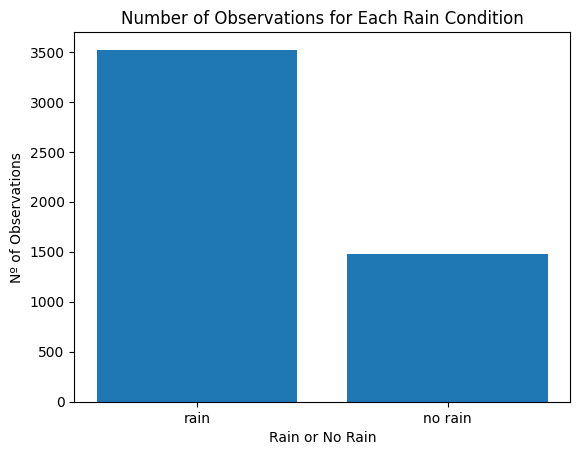

In [10]:
rain_counts = Weather['Rain'].value_counts() # Count obs
print(rain_counts)

print("\nTotal observations:", Weather['Rain'].count())

plt.bar(rain_counts.index, rain_counts.values)
plt.xlabel("Rain or No Rain")
plt.ylabel("Nº of Observations")
plt.title("Number of Observations for Each Rain Condition")
plt.show()

In [ ]:
"""
I'm using a boxplot to lay the info. rain has 3521 instances and no rain has 1479 instances.
In total, there are 5000 observations on the "Rain" variable.
"""

- Q3. Produza gráficos de dispersão que mostrem a relação entre as variáveis abaixo e indique se há relação linear entre elas. Se houver, indique se é positiva ou negativa:
    - a) Temperature x Humidity.
    - b) Cloud_Cover x Wind_Speed.
    - c) Temperature x Cloud_Cover.
    - d) Pressure x Pollen.

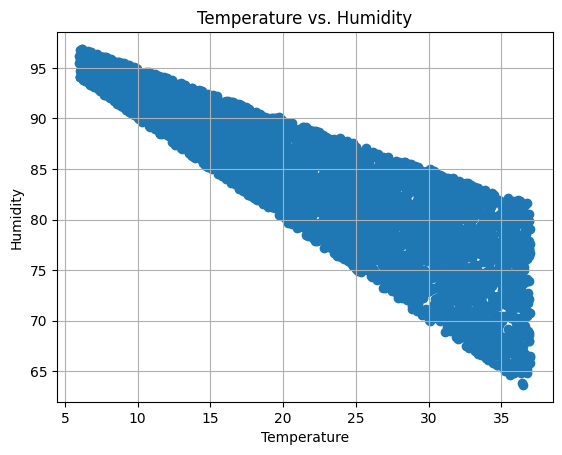

In [37]:
# Temperature x Humidity
plt.scatter(Weather['Temperature'], Weather['Humidity'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity')
plt.grid(True)
plt.show()

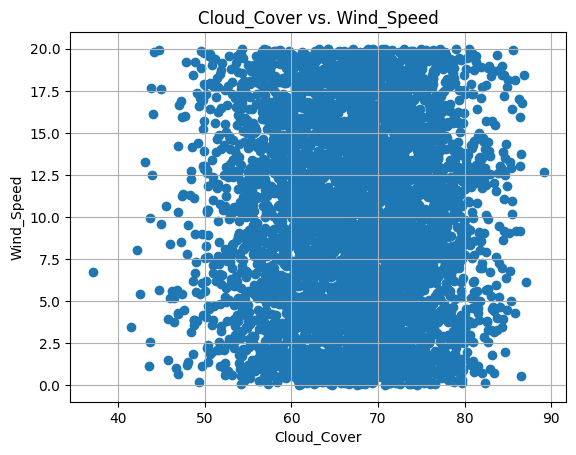

In [38]:
# Cloud_Cover x Wind_Speed
plt.scatter(Weather['Cloud_Cover'], Weather['Wind_Speed'])
plt.xlabel('Cloud_Cover')
plt.ylabel('Wind_Speed')
plt.title('Cloud_Cover vs. Wind_Speed')
plt.grid(True)
plt.show()

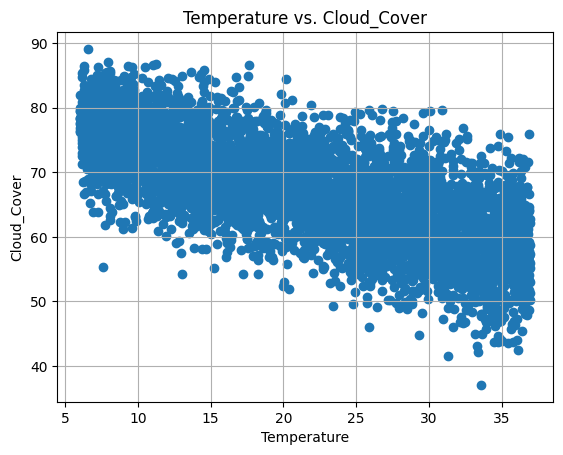

In [39]:
# Temperature x Cloud_Cover
plt.scatter(Weather['Temperature'], Weather['Cloud_Cover'])
plt.xlabel('Temperature')
plt.ylabel('Cloud_Cover')
plt.title('Temperature vs. Cloud_Cover')
plt.grid(True)
plt.show()

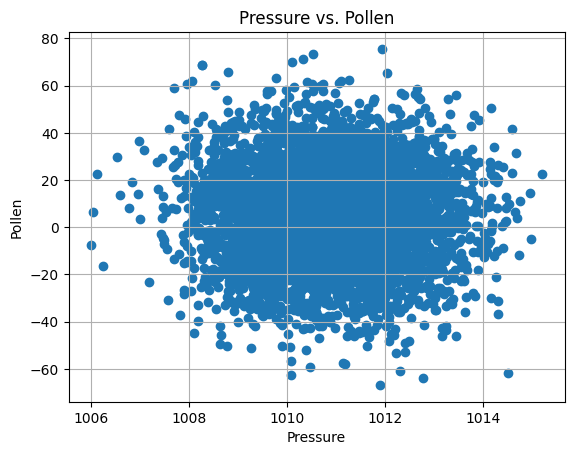

In [40]:
# Pressure x Pollen
plt.scatter(Weather['Pressure'], Weather['Pollen'])
plt.xlabel('Pressure')
plt.ylabel('Pollen')
plt.title('Pressure vs. Pollen')
plt.grid(True)
plt.show()

In [ ]:
"""
Temp x Humidity = Clear negative linear relationship
Cloud Cov x Wind Spee = Nothing
Temp x Cloud Cov = Clear little negative linear relationship
Pressure x Pollen = Nothing
"""

- Q4. Utilize um boxplot para comparar os valores de Temperature em dias com chuva (Rain = "rain") e sem chuva (Rain = "no rain").
    - a) Qual a diferença entre as medianas dos dois grupos?
    - b) Como você interpreta os resultados em relação a probabilidade de chuva

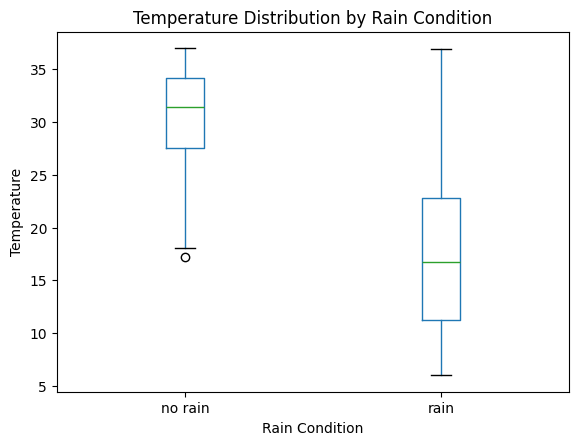

Median temperature on rainy days: 16.782085444967983
Median temperature on non-rainy days: 31.369793168165597
Difference between medians: -14.587707723197614


In [12]:
# Temperature by Rain
Weather.boxplot(column='Temperature', by='Rain', grid=False)
plt.title('Temperature Distribution by Rain Condition')
plt.ylabel('Temperature')
plt.xlabel('Rain Condition')
plt.show()

# Calcular the medians for rain & no rain
median_rain = Weather[Weather['Rain'] == 'rain']['Temperature'].median()
median_no_rain = Weather[Weather['Rain'] == 'no rain']['Temperature'].median()

# Print the resuls
print(f"Median temperature on rainy days: {median_rain}")
print(f"Median temperature on non-rainy days: {median_no_rain}")
print(f"Difference: {median_rain - median_no_rain}")

In [ ]:
"""
Lower temperatures: More likely to rain (around 16.7 ºC)
Higher temperatures: Less likely to rain (around 31 ºC)
They are both clearly separated by a huge difference between medians. The quartiles
don't even solapate
"""

- Q5. Faça um modelo de regressão linear para prever `Rain` utilizando `Temperature`, `Humidity`, `Wind_Speed`, `Cloud_Cover`, `Pollen` como variáveis preditoras.
    - a) O modelo é bom? Justifique.
    - b) Todas as variáveis possuem significância estatística? Justifique.

In [26]:
# Change 'Rain' tu numeric values
Weather['Rain'] = Weather['Rain'].replace({'rain': 1, 'no rain': 0})

# mAKE everything numeric
Weather['Rain'] = Weather['Rain'].astype(float)

<ipython-input-26-680be8009ecc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Weather['Rain'] = Weather['Rain'].replace({'rain': 1, 'no rain': 0})


In [29]:
Weather.head()
#print(Weather[Weather['Rain'] == -1])

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain,Pollen,Temp_Humidity_Ratio
0,17.610744,87.728521,5.297048,62.743508,1010.586973,1.0,7.256510,0.200739
1,35.472143,73.867039,2.620570,53.467701,1009.352758,0.0,4.669294,0.480210
2,28.691812,73.394837,5.894646,60.659964,1011.611002,0.0,20.143227,0.390919
3,24.558413,83.545809,5.236431,60.967281,1011.052922,1.0,13.012567,0.293948
4,10.836578,89.869698,12.754228,77.458930,1010.288088,1.0,-2.356797,0.120580


In [35]:
model = smf.ols('Rain ~ Temperature + Humidity + Wind_Speed + Cloud_Cover + Pollen', data=Weather)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rain   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1908.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:12:55   Log-Likelihood:                -502.17
No. Observations:                5000   AIC:                             1016.
Df Residuals:                    4994   BIC:                             1055.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.1855      0.115    -36.386      

In [ ]:
"""
R Squared has a 65,6% of responsability explaining the data, is an "OK" fit
"""

In [ ]:
"""
The Windspeed and the Pollen are not statistically significant (p values are above 0.05, all the others are)
"""

- Q6 Crie outro modelo de regressão linear.
    - a) Qual o motivo de você ter escolhido as variáveis preditoras do modelo criado?
    - b) Qual dos dois modelos é melhor? Justifique.

In [41]:
!pip install seaborn
import seaborn as sns

<Axes: >

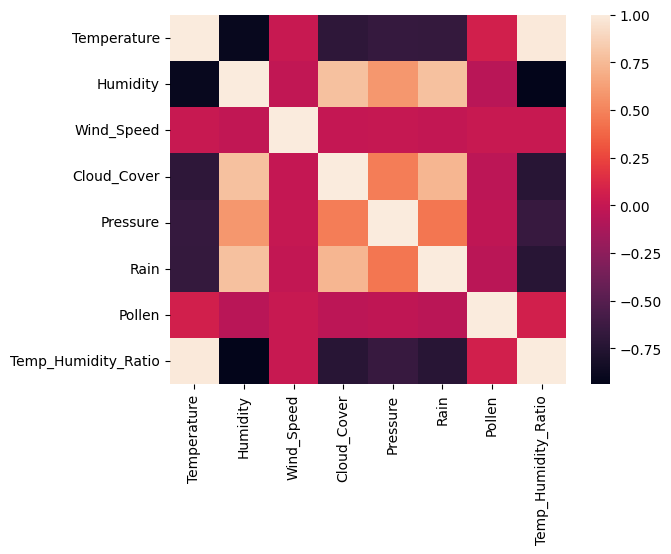

In [42]:
sns.heatmap(Weather.corr())

In [47]:
model = smf.ols('Rain ~ Temperature + Humidity + Cloud_Cover + Temp_Humidity_Ratio', data=Weather)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rain   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2818.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:23:52   Log-Likelihood:                -220.91
No. Observations:                5000   AIC:                             451.8
Df Residuals:                    4995   BIC:                             484.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.8067    

In [ ]:
"""
This last one can improve the other one marginally, also by reducing the
non-significant variables the p-values work much better!
It's not perfect but there's a slight improvement to the R^2
"""

- Q7. Faça um modelo de regressão logística para prever `Rain`.
    - a) O modelo é bom? Justifique.
    - b) Quais os valores de `precision` e `recall` para o modelo?

In [61]:
Weather['Rain'] = pd.get_dummies(Weather['Rain'], drop_first=True, dtype='float')

In [62]:
model = smf.logit(formula='Rain ~ Temperature + Humidity + Cloud_Cover', data=Weather)
result = model.fit()
print(result.summary())

         Current function value: 0.059424
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   Rain   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4996
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.9021
Time:                        11:34:47   Log-Likelihood:                -297.12
converged:                      False   LL-Null:                       -3036.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -80.5139      3.776    -21.321      0.000     -87.915     -73.113
Temperature    -0.0053      0.016     -0.339      0.735      -

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
probs = result.predict()
print(np.median(probs))

0.9945367774698204


In [64]:
labels = np.array(['no rain']*len(Weather))
labels[probs > 0.5] = 'rain'
labels

array(['rain', 'no rain', 'no rain', ..., 'rain', 'no rain', 'rain'],
      dtype='<U7')

In [65]:
Weather = pd.read_csv("dataset_weather1.csv")

In [67]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix

In [68]:
print(confusion_matrix(labels, Weather.Rain))

[[1476    1]
 [   3 3520]]


In [70]:
print("Precision: ", (1476+3250)/4730)

Precision:  0.999154334038055


- Q8. Dentre os modelos criados para regressão linear e logística, qual deles você escolheria? Justifique.

In [ ]:
"""
The logistic, straight up. To a binary question like "is it going to rain" or not, a logistic "Yes" "No"
answer is the way to go

The precision is
"""